# 제6회 기출동형 모의고사

머신러닝 (50점)

• student-mat.csv 데이터. 학생의 결석횟수 등급을 예측하기 위한 예제 데이터이다.

• 데이터 설명: 두 학교의 중등교육 학생 결석횟수 등급과 연계된 학생 정보 데이터

• sex: 학생의 성별(F: 여성 / M: 남성)

• age: 학생의 나이(숫자 : 15세부터 22세까지)

• famsize: 가족 규모(이진수 : 'LE3' - 3 이하 또는 'GT3' - 3보다 큼)

• Pstatus: 부모의 동거 상태(이진수 : 'T' - 동거 또는 ‘A’- 별거)

• Medu: 어머니의 교육
  0 : 없음, 1 : 초등 교육(4학년), 2 : 5~9학년, 3 : 중등 교육 또는 4 : 고등 교육

• Fedu: 아버지의 교육
 숫자: 0- 없음, 1 - 초등 교육(4학년), 2- 5~9학년, 3 - 중등 교육 또는 4 - 고등 교육

• reason: 이 학교를 선택하는 이유(명목 : '집'에서 가까움, 학교 '평판', '학과' 선호도 또는 '기타')

• guardian: 학생의 보호자

• traveltime: 집에서 학교까지 이동 시간
  (숫자 : 1- <15분, 2 - 15~30분, 3 - 30분~1시간 또는 4 -> 1시간)

• studytime: 주당 공부 시간(숫자: 1 - <2시간, 2 - 2~5시간, 3 - 5~10시간 또는 4 -> 10시간)

• failures: 과거 클래스 낙제횟수

• paid : 코스 과목 내 추가 유료 수업(예 또는 아니오)

• activities: 과외 활동(예 또는 아니오)

• famrel: 가족 관계의 질(숫자 : 1 - 매우 나쁨 ~ 5 - 훌륭함)

• freetime: 방과 후 자유 시간(숫자: 1 - 매우 낮음 ~ 5 - 매우 높음)

• absences_grade : 결석 횟수 (총 1~5등급 구간) 

1: 3회 미만 

2: 3~5회 

3: 5~7회

4: 7~9회

5: 10회 이상

1. 데이터 전처리 및 시각화
(1) EDA를 진행하고, 차원축소의 필요성이 있는지 판단하시오.

(2) 데이터 품질을 개선할 수 있는 방법을 제안하고 데이터세트를 재생성하시오.

(3) (2)에서 제시한 방법이 데이터 과적합이 된다는 가정하에 과적합을 해결할 수 있는 2가지 방안을 제시
하고 각 방법의 장단점을 기술하시오.

2. 데이터 분석
(1) 데이터세트를 기준으로 random forest, neural network, lightgbm 3가지 방식으로 학교 결석 횟수
등급을 예측하는 모델을 만들고, fl score로 모델을 평가하시오.

(2) Hard Voting. Soft Voting에 대한 장단점을 설명하고 2-(1)의 3가지 모델로 구현하시오. 그리고 두
방식의 fl-score를 비교하시오.

(3) 총 5개 모델(RF, NN, LGBM, Hard Voting. Soft Voting) 중 실시간 온라인 시스템에 가장 적합한
모델과 선정이유를 객관적으로 제시하시오.

3. 데이터 모델링
(1) 적정 모델과 선정 및 모델링 과정에서 추가적으로 고려해볼 만한 사항을 설명하시오.

(2) 모델을 학교 시스템에 적용하여 활용하려 한다. 모델 적용 및 운영과정에서 고려해볼 만한 사항을 설
명하시오.

# ■정답 및 해설

# 1.데이터 전처리 및 시각화

(1) EDA를 진행하고, 차원축소의 필요성이 있는지 판단하시오. [60분]

In [4]:
# 차원축소가 필요하지는 않다.
# EDA 결과 차원을 축소할 만큼 데이터의 특성이 많지 않으며, 
# 상관관계 히트맵을 보았을 때, 특성 간 상관관계가 높은 컬럼이 없으므로 차원축소를 진행하지 않아도 된다.

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
url='https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/28_problem1.csv'
data = pd.read_csv(url)
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,studytime,failures,paid,activities,famrel,freetime,absences_grade
0,GP,F,18,U,GT3,A,4,4,course,mother,2,2,0,no,no,4,3,3.0
1,GP,F,17,U,GT3,T,1,1,course,father,1,2,0,no,no,5,3,2.0
2,GP,F,15,U,LE3,T,1,1,other,mother,1,2,3,yes,no,4,3,4.0
3,GP,F,15,U,GT3,T,4,2,home,mother,1,3,0,yes,yes,3,2,1.0
4,GP,F,16,U,GT3,T,3,3,home,father,1,2,0,yes,no,4,3,2.0


In [5]:
#1. 데이터 탐색
data.info()
# absences_grade에 결측치가 15개 존재하고, 그외 여러 object범주형 변수가 포함되어 있음을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          395 non-null    object 
 1   sex             395 non-null    object 
 2   age             395 non-null    int64  
 3   address         395 non-null    object 
 4   famsize         395 non-null    object 
 5   Pstatus         395 non-null    object 
 6   Medu            395 non-null    int64  
 7   Fedu            395 non-null    int64  
 8   reason          395 non-null    object 
 9   guardian        395 non-null    object 
 10  traveltime      395 non-null    int64  
 11  studytime       395 non-null    int64  
 12  failures        395 non-null    int64  
 13  paid            395 non-null    object 
 14  activities      395 non-null    object 
 15  famrel          395 non-null    int64  
 16  freetime        395 non-null    int64  
 17  absences_grade  380 non-null    flo

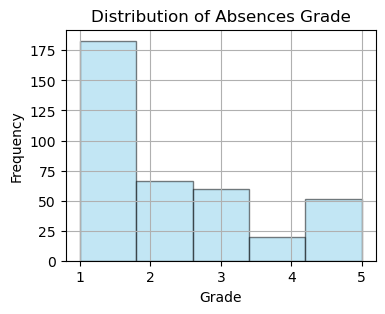

In [10]:
#수치형 변수인 경우, 히스토그램으로 분포를 바로 시각화 가능
plt.figure(figsize=(4, 3))
plt.hist(data['absences_grade'], bins=5, color='skyblue', edgecolor='black', alpha=0.5)
plt.title('Distribution of Absences Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

# 종속변수인 absences_grade를 시각화하여 분포를 살펴보았을 때, 
# 결석등급은 1 구간(결석 수 3회 미만)이 가장 많았다. 

In [11]:
#2. 기술통계 분석
print(data.describe())
# 기술통계량을 살펴보면 종속변수인 결석 등급은 2.18등급이 평균임을 알 수 있다.

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime  absences_grade  
count  395.000000  395.000000      380.000000  
mean     3.944304    3.235443        2.184211  
std      0.896659    0.998862        1.424536  
min      1.000000    1.000000        1.000000  
25%      4.000000    3.000000 

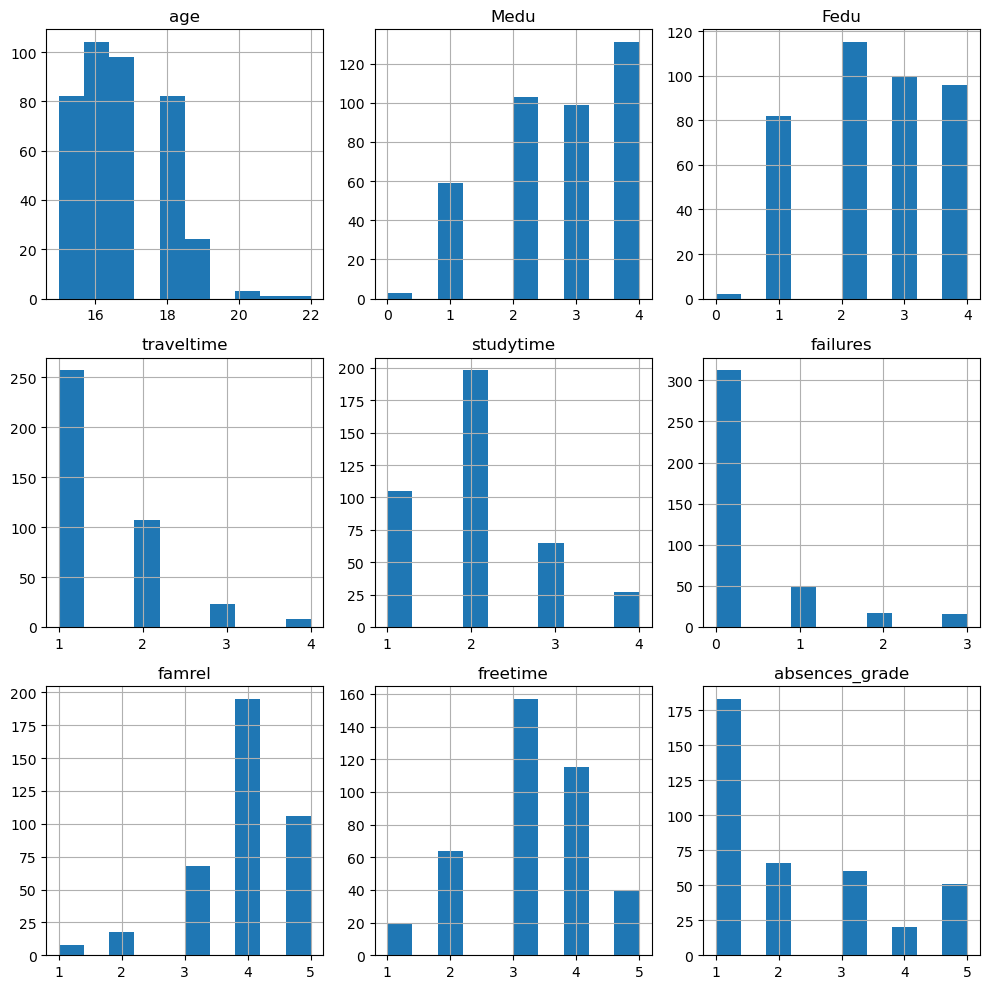

In [12]:
#3. 시각화
#수치형 변수 히스토그램
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

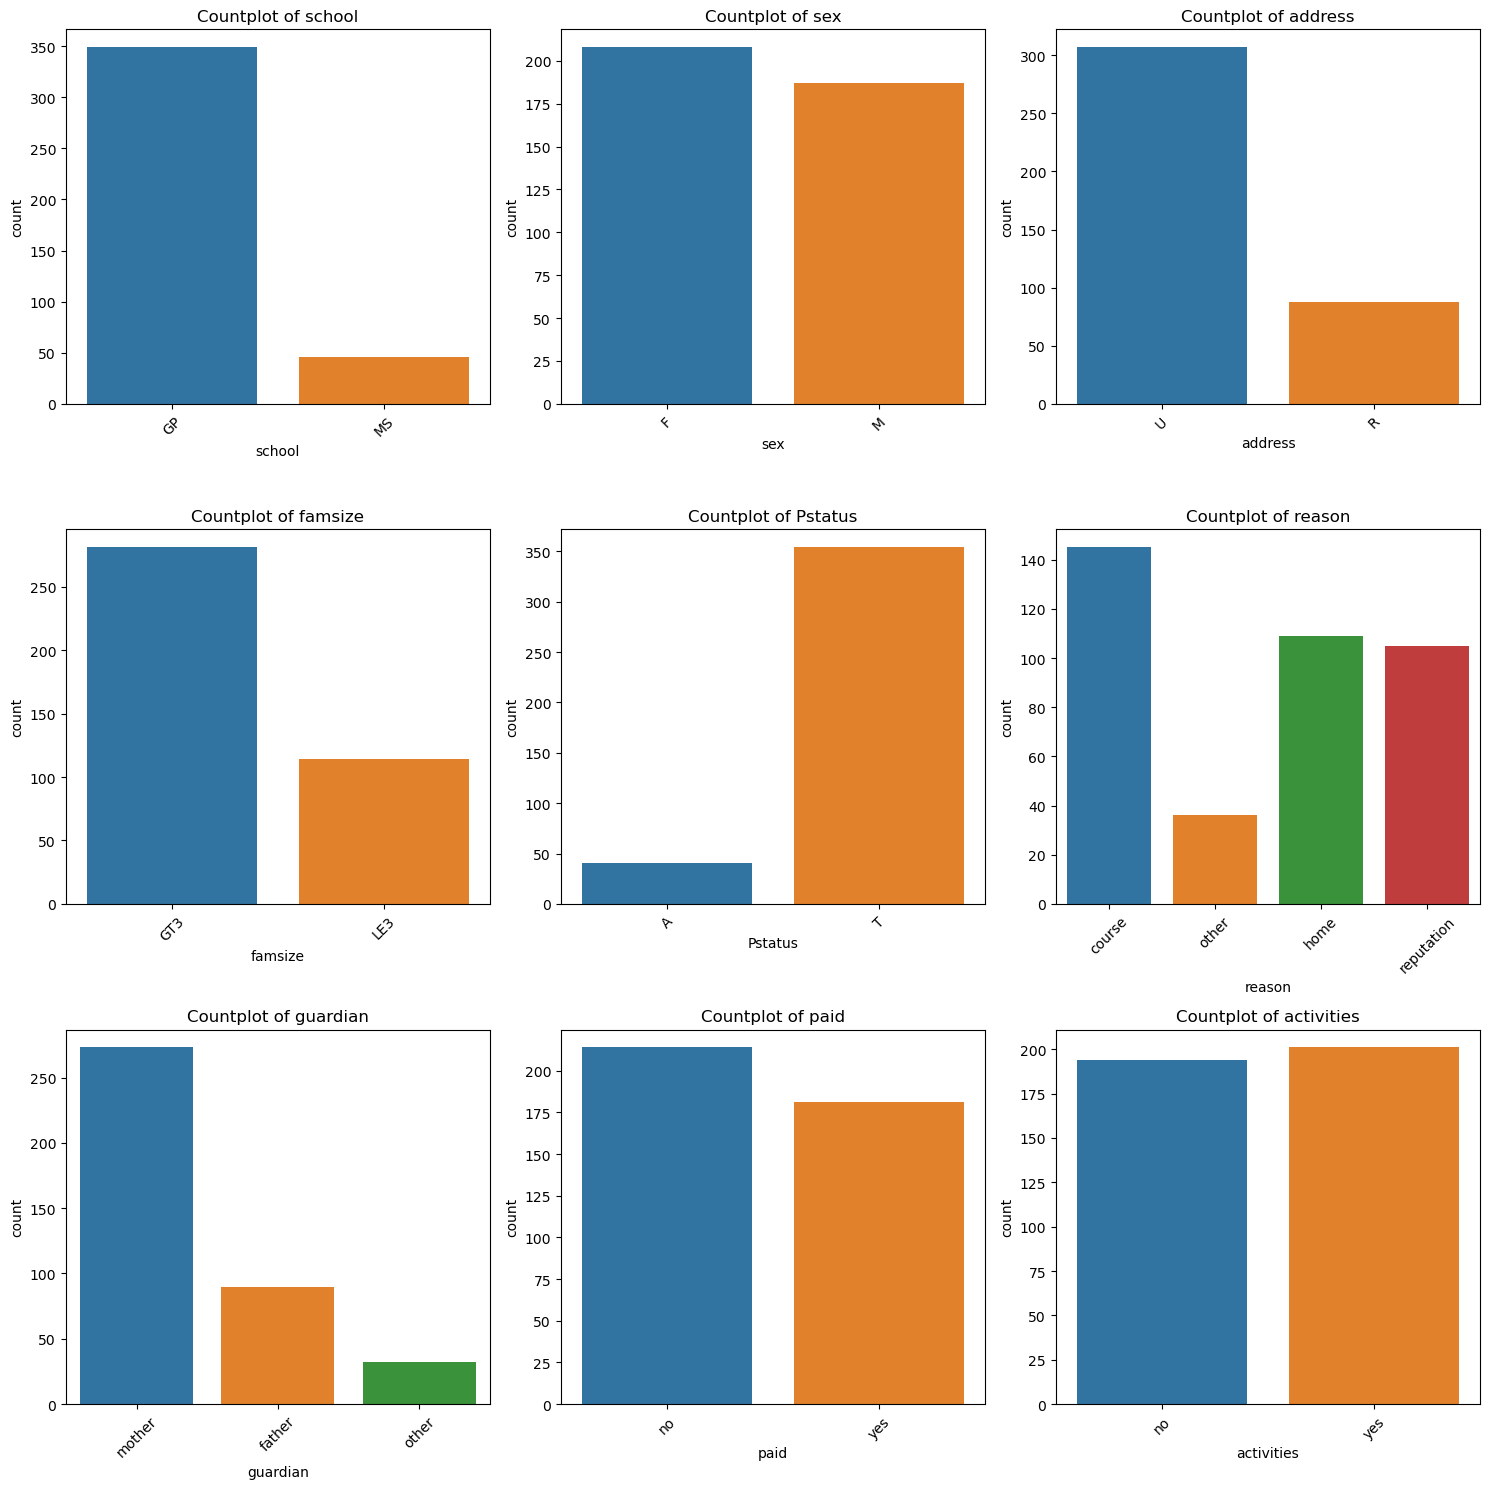

In [14]:
#4. 범주형 변수 시각화
categorical_features = data.select_dtypes(include=['object']).columns
#그래프의 전체 크기 설정
num_cols =3
num_rows = (len(categorical_features) -1) // num_cols +1
plt.figure(figsize=(15, 5 * num_rows))

#범주형 변수를 3열로 나열하여 그래프 그리기
for i, col in enumerate (categorical_features, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot (x=col, data=data)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 연속형, 범주형 변수를 모두 시각화하므로 모든 변수들의 분포를 알 수 있다. 
# GP학생의 수와 U주소의 수가 유사하다.
# Pastatus(부모와 동거 여부)는 A(별거)보다 T(동거)가 훨씬 많다.
# 보호자가 어머니인 경우가 아버지인 경우보다 많았으며, 이 외에는 범주형 변수 중 치우치는 분포는 없었다.

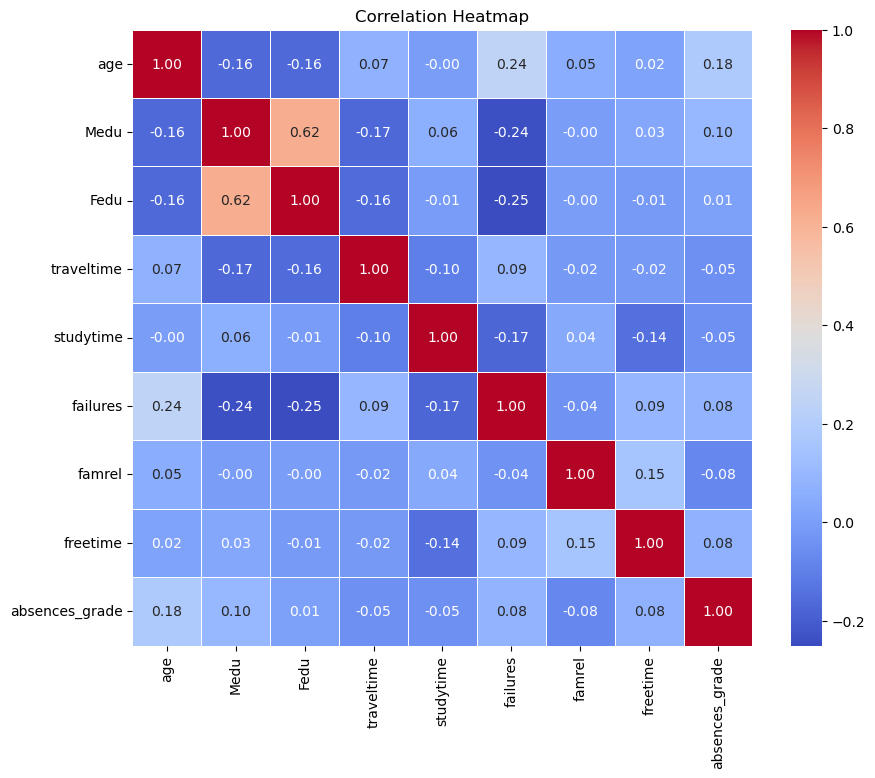

In [16]:
#상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# 상관관계 분석결과 0.5 이상의 상관관계를 보이는 변수들은 없었다.

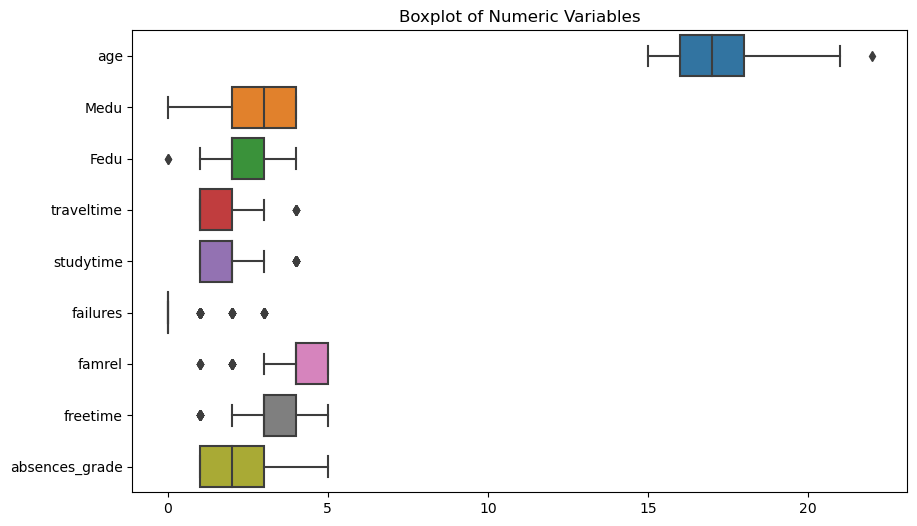

In [18]:
#이상치 확인 (상자 그림)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h')
plt.title('Boxplot of Numeric Variables')
plt.show()

(2) 데이터 품질을 개선할 수 있는 방법을 제안하고 데이터세트를 재생성하시오.

In [19]:
# EDA 결과 결측치가 존재하여 평균값으로 대체할 수 있다.
# 범주형 변수를 머신러닝 모델에 사용하기 위해서는 숫자 형태로 변환해야 한다. 
# 원-핫 인코딩 (One-Hot Encoding)을 통해 각 범주형 변수의 각 범주를 새로운 이진 변수로 변환한다.

#1. 결측치 처리: 평균값으로 채우기
mean_absences_grade = data['absences_grade'].mean()
data['absences_grade'].fillna(mean_absences_grade, inplace=True)
#재생성된 데이터세트 정보 출력
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          395 non-null    object 
 1   sex             395 non-null    object 
 2   age             395 non-null    int64  
 3   address         395 non-null    object 
 4   famsize         395 non-null    object 
 5   Pstatus         395 non-null    object 
 6   Medu            395 non-null    int64  
 7   Fedu            395 non-null    int64  
 8   reason          395 non-null    object 
 9   guardian        395 non-null    object 
 10  traveltime      395 non-null    int64  
 11  studytime       395 non-null    int64  
 12  failures        395 non-null    int64  
 13  paid            395 non-null    object 
 14  activities      395 non-null    object 
 15  famrel          395 non-null    int64  
 16  freetime        395 non-null    int64  
 17  absences_grade  395 non-null    flo

In [21]:
#2. 범주형 변수를 원-핫 인코딩으로 변환
data_encoded = pd.get_dummies(data, columns=['school', 'sex','address', 'famsize', 'Pstatus', 'reason', 'guardian', 'paid','activities'])

# 결과 확인
# print(data_encoded.head())
display(data_encoded.head())

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,absences_grade,school_GP,...,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,paid_no,paid_yes,activities_no,activities_yes
0,18,4,4,2,2,0,4,3,3.0,1,...,0,0,0,0,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,2.0,1,...,0,0,0,1,0,0,1,0,1,0
2,15,1,1,1,2,3,4,3,4.0,1,...,0,1,0,0,1,0,0,1,1,0
3,15,4,2,1,3,0,3,2,1.0,1,...,1,0,0,0,1,0,0,1,0,1
4,16,3,3,1,2,0,4,3,2.0,1,...,1,0,0,1,0,0,0,1,1,0


(3) (2)에서 제시한 방법이 데이터 과적합이 된다는 가정하에

과적합을 해결할 수 있는 2가지 방안을 제시하고 각 방법의 장단점을 기술하시오.

과적합의 해결방법은 ①규제추가 ②교차검증이 있다.

① 규제 추가(Regularization) : 릿지 또는 라쏘 회귀 등

장점

•모델의 복잡도를 감소시켜 과적합을 방지한다.

•모델 파라미터에 페널티를 부여하여 너무 큰 파라미터 값이 발생하지 않도록 제한한다.

•일반화 성능을 향상시킬 수 있다.

단점

•적절한 규제 하이퍼파라미터를 선택하는 것이 어려울 수 있다.

•모델의 복잡성을 줄이는 만큼 학습 데이터에 대한 성능이 감소할 수 있다.

② 교차 검증(Cross Validation): K-폴드 교차검증 등 사용 가능

장점

•데이터를 여러 번 나누어 모델을 평가하므로 일반화성능을 더 정확하게 추정할 수 있다.

•과적합을 방지하기 위해 모델의 일반화 성능을 더 잘 평가할 수 있다.

단점

•계산 비용이 더 많이 들 수 있다.

•모델을 여러 번 훈련하므로 시간이 더 오래 걸릴 수 있다.

# 2. 데이터 분석  [40분]

(1) 데이터세트를 기준으로 random forest, neural network, lightgbm 3가지 방식으로 학교 결석 횟수등급
을 예측하는 모델을 만들고, f1 score로 모델을 평가하시오.

In [27]:
# f1 score는 분류분석의 지표이므로, 타깃데이터를 범주형 변수로 변환해 주어야 한다.
data_encoded['absences_grade'] = data_encoded['absences_grade'].astype('int').astype('category')
data_encoded

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

# data_encoded 데이터세트에서 특성과 타깃데이터를 분리
X = data_encoded.drop(columns=['absences_grade'])
y = data_encoded [ 'absences_grade']

#훈련데이터와 테스트데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_f1_score = f1_score (y_test, rf_predictions, average='micro')

#Neural Network 모델학습
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_f1_score = f1_score(y_test, nn_predictions, average='micro')

#LightGBM 모델학습
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)
lgbm_f1_score = f1_score (y_test, lgbm_predictions, average='micro')

print("Random Forest F1 Score:", rf_f1_score)
print("Neural Network F1 Score:", nn_f1_score)
print("LightGBM F1 Score:", lgbm_f1_score)

# Random Forest F1 Score: 0.4177215189873418
# Neural Network F1 Score: 0.4936708860759494 ★
# LightGBM F1 Score: 0.35443037974683544

# F1 score : 정밀도와 재현율의 조화 평균으로 계산되는 평가지표. 분류 모델의 성능을 종합적으로 평가한다. 
# F1 모델 평가결과 해당 데이터에서 Neural Network 모델이 성능이 가장 좋다.

C:\Users\jcj13\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest F1 Score: 0.4177215189873418
Neural Network F1 Score: 0.4936708860759494
LightGBM F1 Score: 0.35443037974683544
